# Sampling Distributions

### Random Sampling in Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

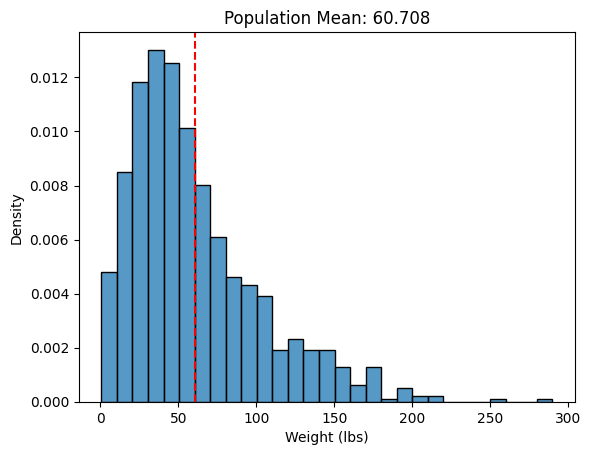

<Figure size 640x480 with 0 Axes>

In [2]:
population = pd.read_csv("data/salmon_population.csv")
population = np.array(population.Salmon_Weight)
pop_mean = round(np.mean(population),3)

## Plotting the Population Distribution
sns.histplot(population, stat='density')
plt.axvline(pop_mean,color='r',linestyle='dashed')
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("Weight (lbs)")
plt.show()
plt.clf() # close this plot

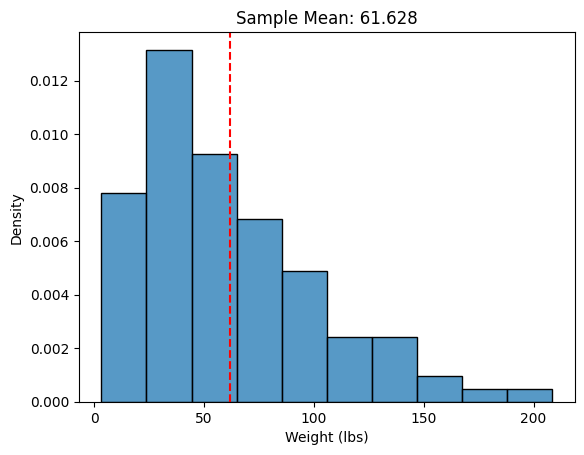

In [3]:
samp_size = 100
# Generate our random sample below
sample = np.random.choice(np.array(population), samp_size, replace = False)

### Define sample mean below
sample_mean = round(np.mean(sample), 3)

### Uncomment the lines below to plot the sample data:
sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()


### Sampling Distributions

As we saw in the last example, each time we sample from a population, we will get a slightly different sample mean.  In order to understand how much variation we can expect in those sample means, we can do the following:

 -  Take a bunch of random samples of fish, each of the same size (50 fish in this example)
 - Calculate the mean for each of the samples
 - Plot a histogram of all the sample means

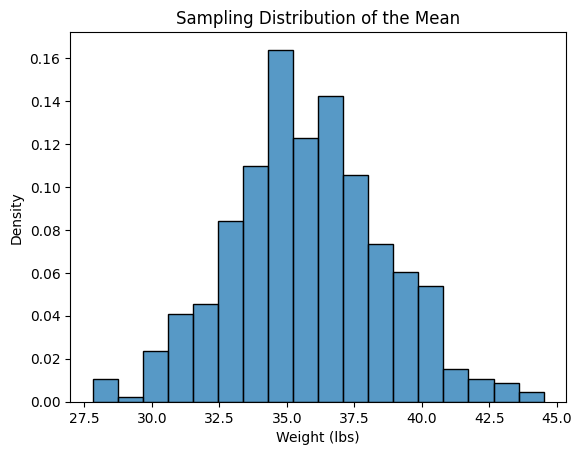

In [4]:
population = pd.read_csv("data/cod_population.csv")
# Save transaction times to a separate numpy array
population = population['Cod_Weight']

sample_size = 50
sample_means = []

for i in range(500):
  samp = np.random.choice(population, sample_size, replace = False)
  # calculate mean here
  sample_mean = round(np.mean(samp), 3)
  # append here
  sample_means.append(sample_mean)

sns.histplot(sample_means,stat='density')
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

### The Central Limit Theorem

The Central Limit Theorem (CLT) allows us to specifically describe the sampling distribution of the mean.

The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. Using a sample size of n > 30 is usually a good rule of thumb, regardless of what the distribution of the population is like. If the distribution of the population is normal, the sample size can be smaller than that.

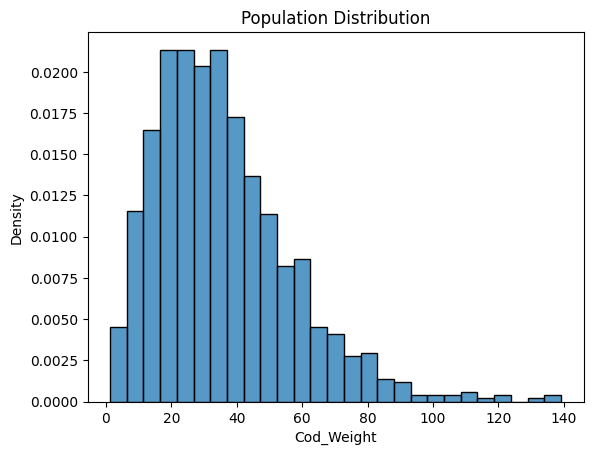

In [5]:
sns.histplot(population, stat = 'density' )
plt.title("Population Distribution")
plt.show()

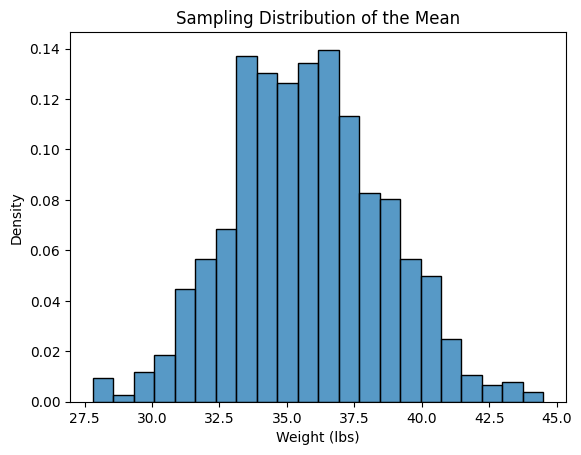

In [6]:
samp_size = 50

for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

plt.clf() # this closes the previous plot
sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

The CLT not only establishes that the sampling distribution will be normally distributed, but it also allows us to describe that normal distribution quantitatively. Normal distributions are described by their mean $μ$  and standard deviation $σ$.

We take samples of size $n$ from a population (that has a true population mean μ and standard deviation of σ) and calculate the sample mean $\bar{x}$:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$


Given that $n$ is sufficiently large ($n > 30$), the sampling distribution of the means will be normally distributed with:
 - The sample mean $\bar{x}$ approximately equal to the population mean $μ$
 - The sample standard deviation equal to the population standard deviation divided by the square root of the sample size. We can write this out as:

$$
Sampling\ distribution\ standard\ deviation = \frac{σ}{\sqrt{n}}
$$

where $σ$ is the population standard deviation and $n$ is the sample size.

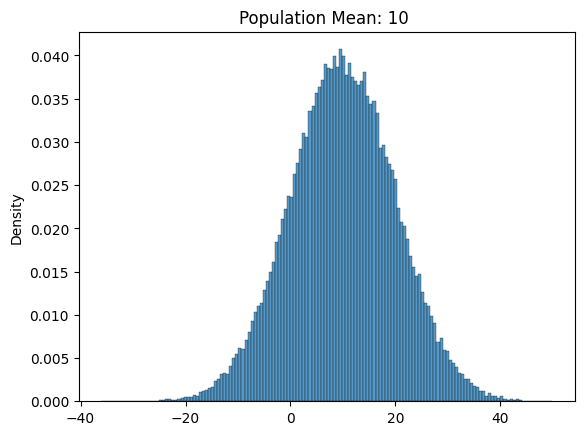

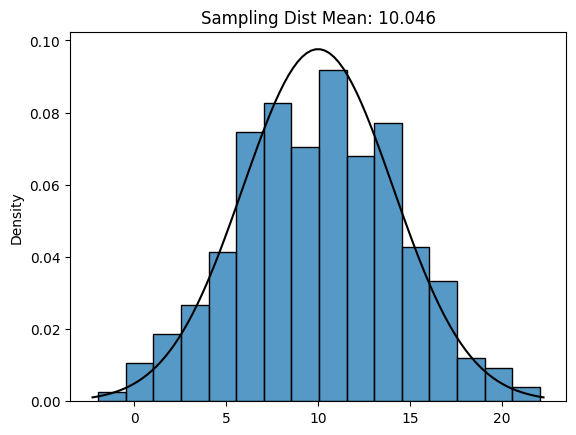

In [7]:
population_mean = 10
population_std_dev = 10
# Set the sample size:
samp_size = 6

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

# Simulate the samples and calculate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)

# Plot the original population
sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()
plt.clf()

## Plot the sampling distribution
sns.histplot(sample_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()

### An extra bit I added...

In the code above, we test out the central limit theorum by taking samples of a certain size and plotting a distribution of the means of those samples.  We can see that the distribution of the means is normal (or close to a normal distribution.)

Recall that for a a sample size to be suitable, the sample mean $\bar{x}$ must be approximately equal to the population mean $μ$.

However, in the code above, we only try one value of sample size at a time. This can be a monotonous process, trying different sample sizes one at a time.

So instead we can write a function that will find an optimal sample size for a given population by taking a range of different sample sizes and finding the corresponding error for each sample size.  The sample size with the lowest error will be the optimal sample size.

In [8]:
def optimise_sample_size(population_mean: int, population_std_dev: int, population_size: int, min_sample_size: int, max_sample_size: int) -> int:

    # Create the population
    population = np.random.normal(population_mean, population_std_dev, size=population_size)
    # create range of sample sizes to test
    sample_sizes = [i for i in range(min_sample_size, max_sample_size+1)]
    global samples_size_errors # declare this dict as global so that it can be accessed outside the function!
    samples_size_errors = {}
    mu = np.mean(population) # population mean
    for sample_size in sample_sizes:
        # Simulate the samples and calculate the sampling distribution
        sample_means = []
        for i in range(500):
            sample_mean = np.random.choice(population, sample_size, replace = False)
            sample_means.append(np.mean(sample_mean))
        # calculate the error for this sample size
        error = abs(mu - np.mean(sample_means))
        samples_size_errors[sample_size] = error
    # print(samples_size_errors)
    # find the sample size with the smallest error
    best_sample_size = None
    try:
        for sample_size in samples_size_errors.keys():
            if samples_size_errors[sample_size] == min(samples_size_errors.values()):
                best_sample_size = sample_size
        if best_sample_size is not None:
            return best_sample_size
        else:
            raise ValueError("No best sample size found")
    except:
        raise ValueError("No best sample size found")

In [9]:
best_sample_size = optimise_sample_size(population_mean=10, population_std_dev=10, population_size=10000, min_sample_size=1, max_sample_size=50)
print(best_sample_size)

23


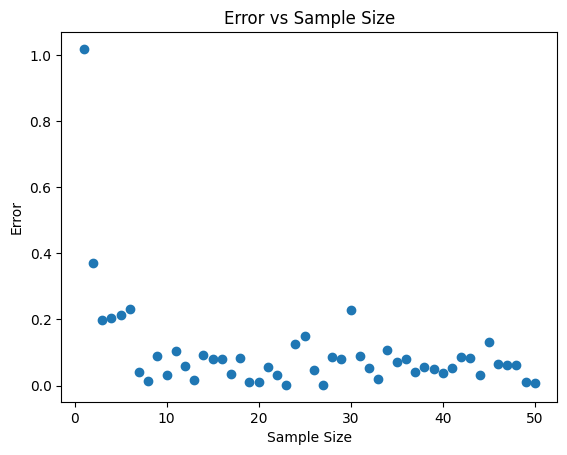

In [10]:
plt.scatter(x = list(samples_size_errors.keys()), y = list(samples_size_errors.values()))
plt.title("Error vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Error")
plt.show()


### Standard Error

The standard error is the standard deviation of the sampling distribution (also known as the standard error of the estimate of the mean.)  It is a measure of the variability between the sample means.  The standard error is calculated as:

$$
Standard\ Error = \frac{σ}{\sqrt{n}}
$$

where $σ$ is the population standard deviation and $n$ is the sample size.

In some instances, we cannot know the population standard deviation, so we estimate the standard error using the sample standard deviation:

$$
\frac{sample\ standard\ deviation}{\sqrt{sample\ size}}
$$

Note that:
 - as sample size increases, the standard error decreases
 - as population standard deviation increases, the standard error increases

So, the _smaller_ the standard error, the more representative the sample mean is of the population mean.

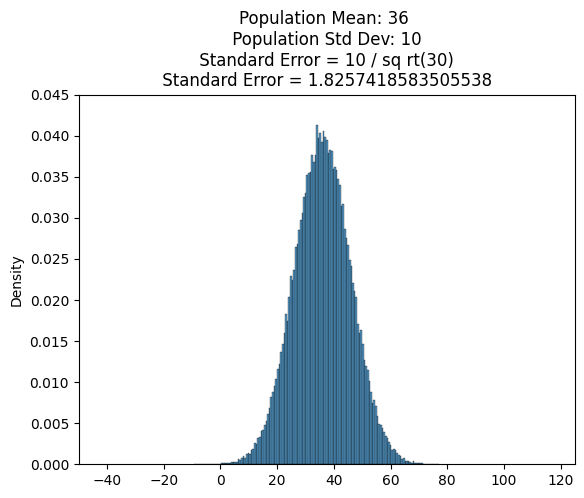

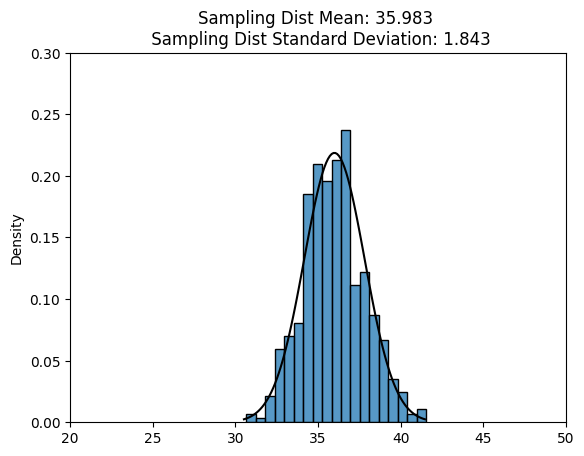

In [11]:
population_mean = 36
population_std_dev = 10
# Set the sample size:
samp_size = 30

### Below is code to create simulated dataset and calculate Standard Error

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

## Simulate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()
plt.clf()

## Plot the sampling distribution
sns.histplot(sample_means, stat = 'density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
# plt.axvline(mean_sampling_distribution,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()

### Biased Estimators

According to the Central Limit Theorem, the mean of the sampling distribution of the mean is equal to the population mean. This is the case for some, but not all, sampling distributions. Remember, you can have a sampling distribution for any sample statistic, including: mean, median, max/min, variance.

Because the mean of the sampling distribution of the mean is equal to the mean of the population, we call it an unbiased estimator. A statistic is called an unbiased estimator of a population parameter if the mean of the sampling distribution of the statistic is equal to the value of the statistic for the population.

The maximum is one example of a biased estimator, meaning that the mean of the sampling distribution of the maximum is not centered at the population maximum.

A biased estimator is one that is consistently too high or too low.  For example, if we were to estimate the population variance using the sample variance, we would find that the sample variance is consistently too low (see the example at the end of the code in the next cell.)  This is because the sample variance is calculated using the sample mean, which is an estimate of the population mean.  The sample mean is an unbiased estimator of the population mean, but the sample variance is a biased estimator of the population variance.

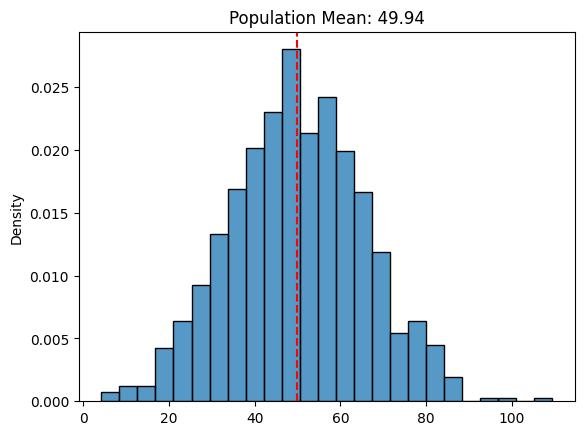

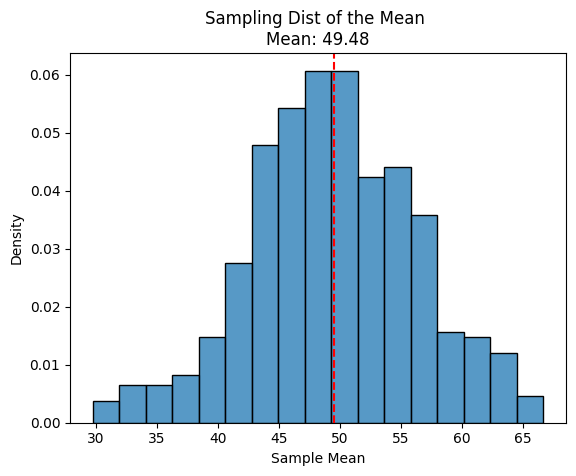

check the bias of the mean estimator:
0.1684225840393978
check the bias of the median estimator:
-0.5422692951313692
check the bias of the variance estimator:
146.1873010368194
population variance: 244.65994344622592
sample variance: 237.4376641612958


<Figure size 640x480 with 0 Axes>

In [12]:
app_stat_text = "Mean"
def app_statistic(x):
    return np.mean(x)

mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")
plt.show()
plt.clf()

sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")
plt.show()
plt.clf()

# define a function to check whether or not the estimator is biased
def check_bias(estimator, population, num_samples, sample_size):
    # create a list to store the sample means
    sample_means = []
    # create a for loop to generate the sample means
    for i in range(num_samples):
        # take a random sample of size sample_size from the population
        sample = np.random.choice(population, sample_size, replace = False)
        # calculate the sample mean
        sample_stat = estimator(sample)
        # append the sample mean to the list of sample means
        sample_means.append(sample_stat)
    # calculate the mean of the sample means
    mean_of_sample_means = np.mean(sample_means)
    # calculate the bias
    bias = mean_of_sample_means - np.mean(population)
    # return the bias
    return bias

# test the check_bias function
print("check the bias of the mean estimator:")
print(check_bias(np.mean, population, 1000, samp_size))
print("check the bias of the median estimator:")
print(check_bias(np.median, population, 1000, samp_size))
print("check the bias of the variance estimator:")
print(check_bias(np.var, population, 1000, samp_size))

print("population variance:", np.var(population))
print("sample variance:", np.var(np.random.choice(population, samp_size, replace = False)))

### The M.V.U.E.

The minimum variance unbiased estimator (M.V.U.E.) is the unbiased estimator with the smallest variance. The M.V.U.E. is the best unbiased estimator.

For example, if we have a sample of size $n$ from a normal distribution, the sample mean is an unbiased estimator of the population mean.  However, the sample variance is a biased estimator of the population variance.  The M.V.U.E. of the population variance is the sample variance.

The sample variance is a biased estimator of the population variance.  However, the sample variance is the M.V.U.E. of the population variance.

### Calculating Probabilities

Once we know the sampling distribution of the mean, we can also use it to estimate the probability of observing a particular range of sample means, given some information (either known or assumed) about the population. To do this, we can use the Cumulative Distribution Function, or (CDF) of the normal distribution.

We know that cod have an average weight of 36 lbs with a standard deviation of 20. We want to try to fit 25 cod fish into our same crate that can hold up to 750 lbs.

Our first step is to calculate the standard error for a sample size of 25. Using the above information, calculate the standard error and assign it to a variable called `standard_error`.

Now that we have our standard error, we can use the normal CDF to calculate the probability that a sample of 25 fish has a mean weight of 30 lbs. Using the function `stats.norm.cdf()`, calculate this probability and assign it to a variable `cod_cdf`.

Given the probability you calculated in the last checkpoint, would you recommend trying to carry 25 cod in the crate?

In [13]:
std_dev = 20
samp_size = 25
standard_error = std_dev / (samp_size**.5)

cod_cdf = stats.norm.cdf((750/25), 36, standard_error)

#print percentage chance of 30 cod weighing 750 or less
print(round(cod_cdf*100,2))

6.68


### Review

In order to review, let’s consider an example from a restaurant serving quarter-pounder burgers. Their quarter-pounders weigh an average of 0.25 lbs with a standard deviation of 0.2 lbs.

1. Let’s say we weigh all their burgers that they cook for dinner on a given night. 64 people order quarter-pounders. What is the probability that the mean will be 0.24 lbs or less?
2. Set up the parameters at the top of the code by filling in values for x, population_mean, population_std_dev, and samp_size.
3. The CDF is printed in the title of the 2nd plot. Take a mental note of the probability of 64 burgers having a mean of 0.24 lbs or less.

On the next night, there’s a delicious special, and fewer people order the burger. Our sample size is now 10.
1. Set the sample size in the simulator to 10 and consider the standard error. Has it changed in the direction you expected?
2. Let’s say your family went to the restaurant and all 5 of you ordered the burger. What is the probability that you receive burgers with an average weight of 0.24 lbs or less?

Probability of a sample mean of 0.24 or less: 22.803


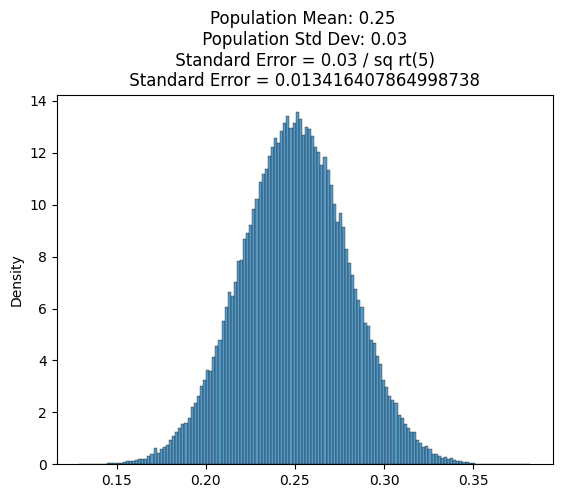

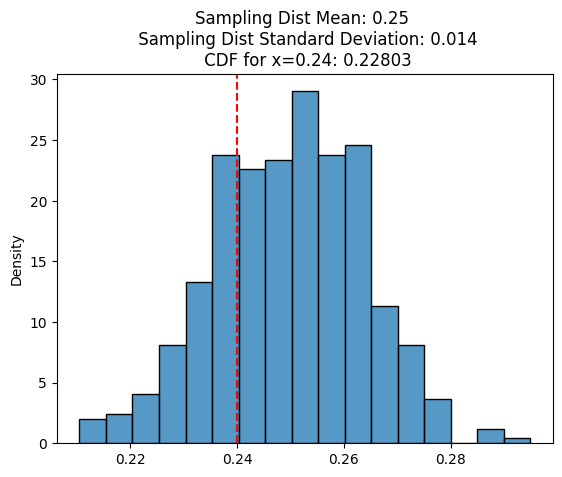

In [14]:
# Set up parameters here:
x = 0.24
population_mean = 0.25
population_std_dev = 0.03   # I changed this to 0.03 because a standard deviation of 0.2 would mean that the min could be around -0.68, which is impossible!
samp_size = 5

### Below is code to create simulated dataset and calculate Standard Error
standard_error = population_std_dev / (samp_size**.5)

this_cdf = round(stats.norm.cdf(x,population_mean,standard_error),5)
print("Probability of a sample mean of {} or less: {}".format(x, this_cdf*100))

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

# Simulate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlabel("")
plt.show()
plt.clf()

# Plot the sampling distribution
sns.histplot(sample_means, stat = 'density')
plt.axvline(x,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}\n CDF for x={x}: {this_cdf}")
plt.xlabel("")
plt.show()